## Section 4.1 Fourier series augmented with polynomials

In [3]:
using Pkg
Pkg.activate("../")
Pkg.instantiate()

  Activating project at `~/Documents/julia/gitpackages/EnrichedAZalgorithm`


Precompiling project...


  ✓ AZalgorithm


  1 dependency successfully precompiled in 1 seconds. 191 already precompiled.


In [4]:
using BasisFunctions, Plots, LinearAlgebra 

Step 1 of the AZ algorithm can be viewed as a change of basis (see section 2.2.3).

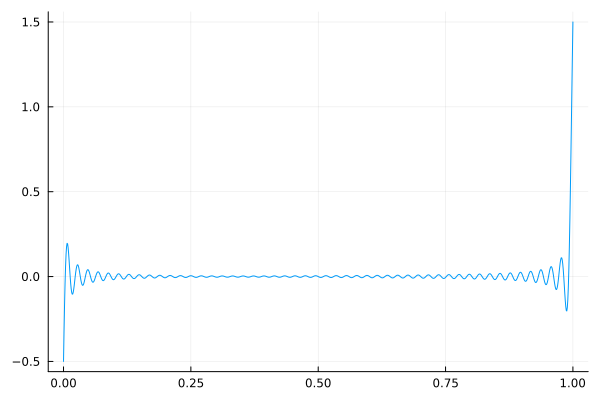

In [7]:
N = 100
K = 5

approxset = Fourier(N) ⊕ (Legendre(K+1) → (0..1))[2:end]
basis = component(approxset,1)
enriched = component(approxset,2)

samples = UnitPeriodicEquispacedGrid(2*N)
Z11 = BasisFunctions.leastsquares(basis,samples)
A11 = evaluation(basis, samples)
A12 = evaluation(enriched, samples)
changeofbasis = [zeros(N+K,N) [matrix(-Z11*A12); I(K)]]
newbasis = changeofbasis * approxset

# first basis function of the new basis
xx = 0:0.001:1
plot(xx,real(newbasis[N+1].(xx)), label="")

Using this new basis we can compute a (near-)optimal sampling distribution for the extra points using the theory from [Cohen, Migliorati 2017] (see section 3.1).

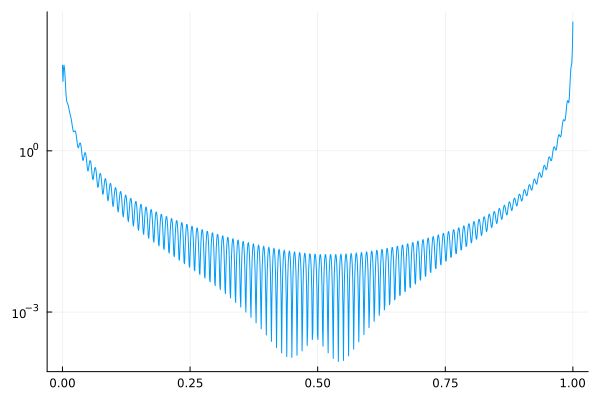

In [4]:
# orthogonalize new basis functions (only K nonzero elements)
G = matrix(gram(newbasis))
A = inv(G[N+1:end,N+1:end])
newbasis_orth = [zeros(N+K,N) [zeros(N,K); BasisFunctions.spd_matrix_sqrt(A)]] * newbasis

# inverse christoffel function --> (near-)optimal sampling distribution
invchristoffel = x -> sum(abs(newbasis_orth[i](x))^2 for i in N+1:N+K)/K
xx = range(0,1,1000)
plot(xx, invchristoffel.(xx), label="", yscale=:log10)